# <br><center>Malware Detection Project</center>
<center>Serena Jin </center>
<br>In this notebook, I will walk through malware detection with deep learning.

The notebook will follow the following machine learning workflow pipeline:

EDA-->Data Cleaning-->Feature Engineering-->ML Model-->Training/Hyper Parameter Tuning-->Evaluation-->Deployment 

In [ ]:
### Install needed ML libraries

In [ ]:
!pip install tensorflow==2.0.0
!pip install keras==2.3.1
!pip install scikit-learn==0.21.3
!pip install seaborn==0.9.0
!pip install matplotlib==3.1.1
!pip install pandas==0.25.3
!pip install numpy==1.17.4

### Imports
 
We will use the standard data science machine learning and deep learning libraries: `numpy`, `pandas`, scikit-learn, tensorflow, and keras. We also use `matplotlib` and `seaborn` for visualization. 

In [81]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint

import numpy as np
import tensorflow as tf
import seaborn as sns
import sys
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)


In [86]:
# Read data to dataframe
df = pd.read_csv("data/dataset.csv").sample(frac = 1)

## 1. Exploratory Data Analysis ( EDA )

EDA is one of the key steps in data science, enabling us to gain some insights and statistical indicators that are essential to data scientists. It performs to define and refine the selection of important feature variables that we will use in our models.

We will visualize most aspects of the data through the columns in the dataset.

In [87]:
df.head(5)

,and,lea,xor,sub,jmp,mov,pop,test,add,call,ret,jne,push,je,inc,shl,or,cmp,class
4292,100,81,60,66,44,503,85,51,45,72,0,0,190,0,56,44,59,92,malware
570,12,17,17,363,73,2542,38,3,419,134,0,0,388,0,7,30,16,180,malware
5832,124,47,126,146,103,599,193,88,161,48,0,0,373,0,130,16,128,113,malware
3805,6,41,10,53,1,239,147,5,100,138,0,0,368,0,1,0,8,7,malware
4445,12,16,17,326,71,2316,27,4,388,180,0,0,392,0,8,24,16,173,malware


In [62]:
# Use format and shape function to get data rows and column numbers

print('This wannacry_data frame has {} rows and {} columns.'.format(df.shape[0], wannacry_data.shape[1]))


This wannacry_data frame has 6425 rows and 18 columns.


In [63]:
# Summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,and,lea,xor,sub,jmp,mov,pop,test,add,call,ret,jne,push,je,inc,shl,or,cmp
count,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6.425000e+03,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000
mean,224.060856,1231.675019,757.039377,388.855253,762.507237,9.989253e+03,1189.676109,864.959844,777.890117,2214.663346,1.585525,297.375720,2305.527004,525.530428,162.970428,87.604825,148.339767,929.626459
std,1521.400486,13602.197762,5559.505952,2853.516602,7024.593456,1.041908e+05,12199.122086,9848.054819,6129.008534,23288.595220,64.527470,4822.900923,11753.032499,9241.093339,940.107808,636.869870,932.612383,8092.266277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,34.000000,13.000000,54.000000,1.000000,1.610000e+02,96.000000,6.000000,99.000000,129.000000,0.000000,0.000000,330.000000,0.000000,1.000000,0.000000,6.000000,8.000000
50%,42.000000,79.000000,67.000000,97.000000,71.000000,7.860000e+02,174.000000,48.000000,184.000000,181.000000,0.000000,0.000000,425.000000,0.000000,10.000000,10.000000,35.000000,126.000000
75%,157.000000,299.000000,282.000000,282.000000,298.000000,2.541000e+03,425.000000,213.000000,402.000000,502.000000,0.000000,0.000000,1077.000000,0.000000,85.000000,50.000000,112.000000,442.000000
max,90087.000000,577799.000000,264307.000000,128566.000000,256484.000000,5.407162e+06,604500.000000,401817.000000,288838.000000,891523.000000,3984.000000,234059.000000,465575.000000,377564.000000,31489.000000,15818.000000,53013.000000,434434.000000


In [64]:
# This method prints information about a DataFrame including the index dtype and column dtypes, 
# non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6425 entries, 825 to 178
Data columns (total 19 columns):
and      6425 non-null int64
lea      6425 non-null int64
xor      6425 non-null int64
sub      6425 non-null int64
jmp      6425 non-null int64
mov      6425 non-null int64
pop      6425 non-null int64
test     6425 non-null int64
add      6425 non-null int64
call     6425 non-null int64
ret      6425 non-null int64
jne      6425 non-null int64
push     6425 non-null int64
je       6425 non-null int64
inc      6425 non-null int64
shl      6425 non-null int64
or       6425 non-null int64
cmp      6425 non-null int64
class    6425 non-null object
dtypes: int64(18), object(1)
memory usage: 1.3+ MB


In [65]:
#check if there is null value
df.isnull().sum()

and      0
lea      0
xor      0
sub      0
jmp      0
mov      0
pop      0
test     0
add      0
call     0
ret      0
jne      0
push     0
je       0
inc      0
shl      0
or       0
cmp      0
class    0
dtype: int64

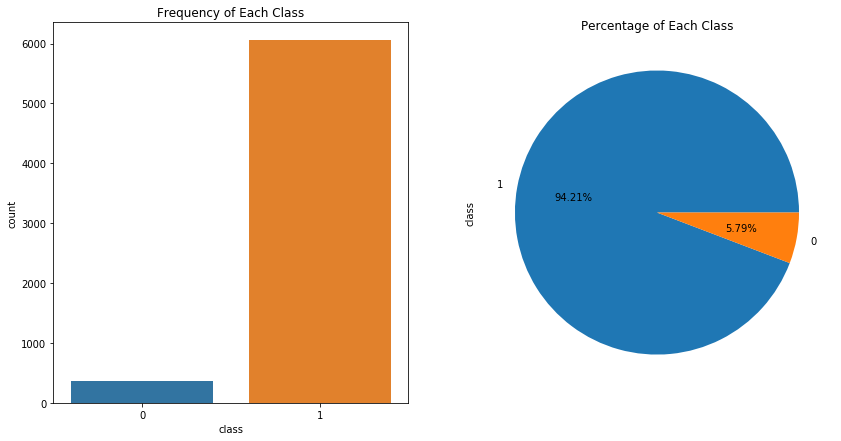

In [84]:
# Target variable distribution visualization

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='class',data=df,ax=axs[0])
axs[0].set_title("Frequency of Each Class")
df['class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of Each Class")
plt.show()

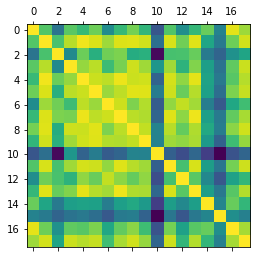

In [66]:
# View any structure you find and any hypotheses you have about that structure.

plt.matshow(df.corr())
plt.show()

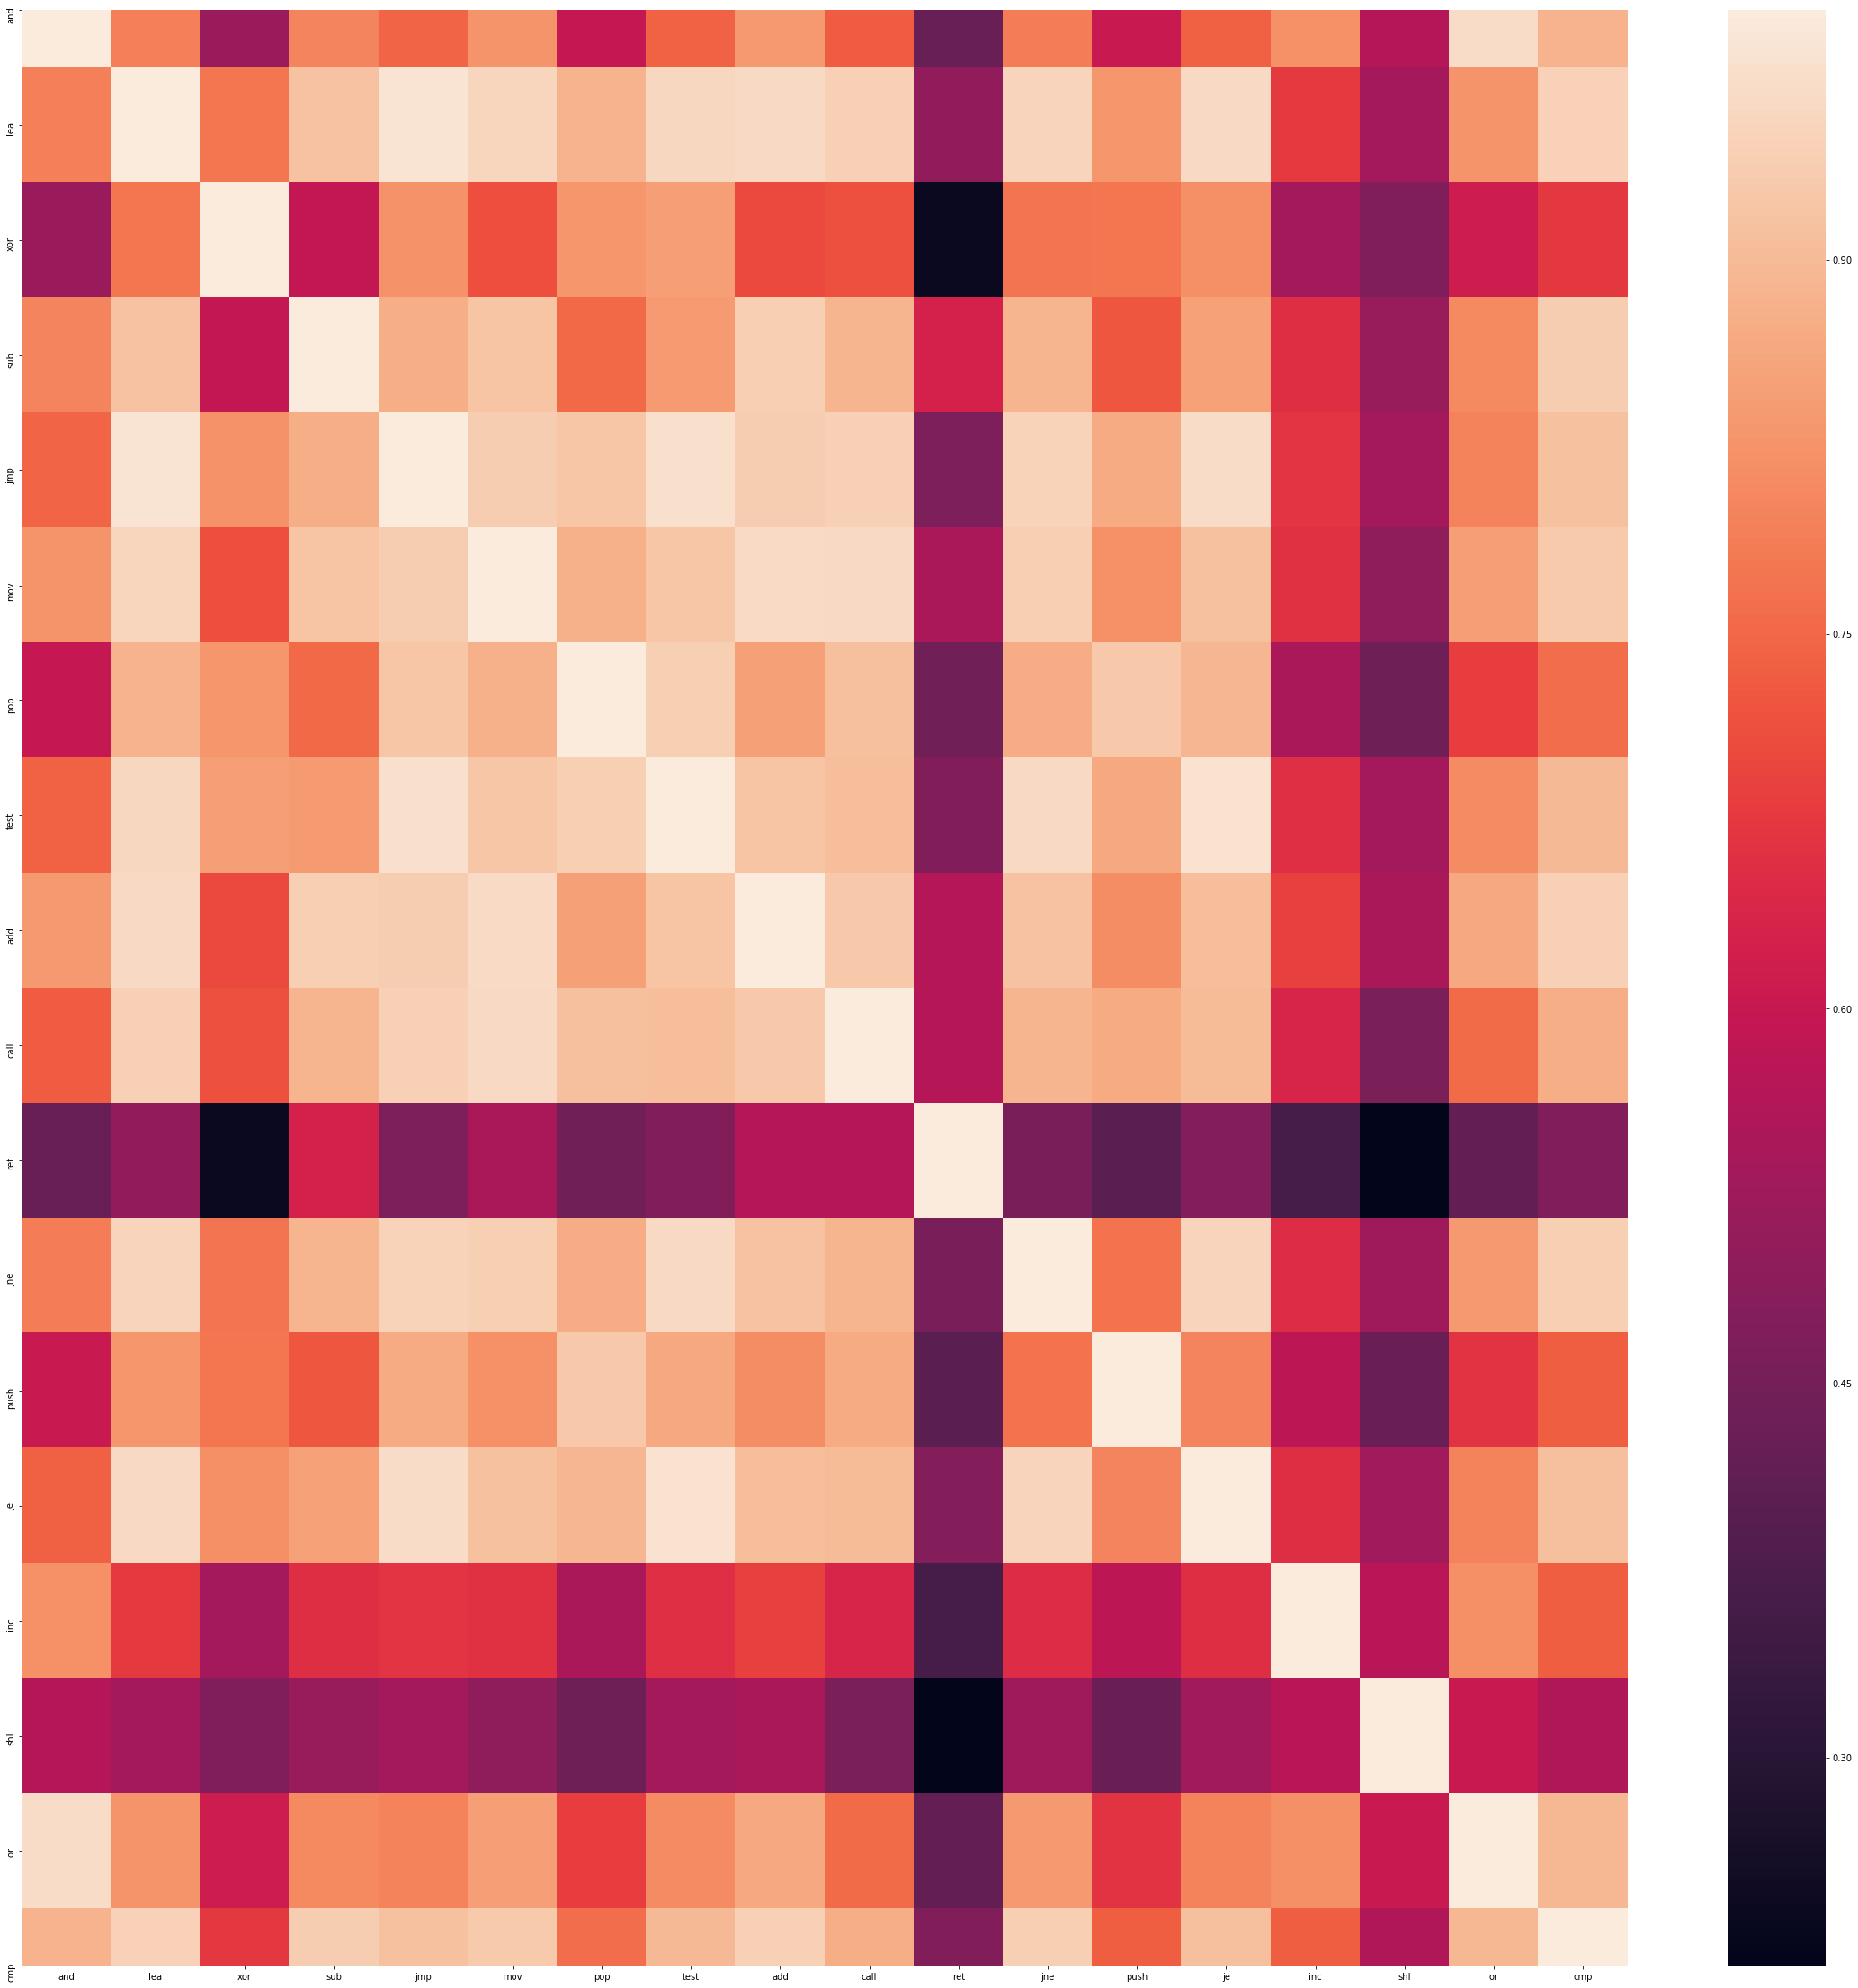

In [67]:
# dataset correlation matrix using a heatmap

plt.figure(figsize=(40,40)) 
sns.heatmap(df.corr())

In [69]:
df.shape

(6425, 19)

# Data preprocessing for ML model trainning


In [73]:
#in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below:
df['class'] = df['class'].astype('category')
#label encoding via attributes .cat.codes on the DataFrame's column.
df['class'] = df['class'].cat.codes


In [74]:
#model trainnig
X = df.iloc[:, df.columns != 'class']
y = df.iloc[:, df.columns == 'class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [75]:
# Importing the Keras libraries and packages, using keras sequetial model
import keras
from keras.models import Sequential
from keras.layers import Dense

inputDim = 18

#batch_
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15, kernel_initializer = 'uniform', activation = 'relu', input_dim = inputDim))
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
4497/4497 [==============================] - 0s 42us/step - loss: 0.3624 - accuracy: 0.9537
Epoch 2/100
4497/4497 [==============================] - 0s 22us/step - loss: 0.1338 - accuracy: 0.9684
Epoch 3/100
4497/4497 [==============================] - 0s 22us/step - loss: 0.0737 - accuracy: 0.9838
Epoch 4/100
4497/4497 [==============================] - 0s 21us/step - loss: 0.0520 - accuracy: 0.9858
Epoch 5/100
4497/4497 [==============================] - 0s 21us/step - loss: 0.0371 - accuracy: 0.9867
Epoch 6/100
4497/4497 [==============================] - 0s 22us/step - loss: 0.0391 - accuracy: 0.9851
Epoch 7/100
4497/4497 [==============================] - 0s 21us/step - loss: 0.0270 - accuracy: 0.9882
Epoch 8/100
4497/4497 [==============================] - 0s 22us/step - loss: 0.0238 - accuracy: 0.9891
Epoch 9/100
4497/4497 [==============================] - 0s 22us/step - loss: 0.0209 - accuracy: 0.9907
Epoch 10/100
4497/4497 [==============================] - 0s 22u